<a href="https://colab.research.google.com/github/MrNobody01/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from nltk.util import pr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score,f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
pip install vaderSentiment

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [61]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [62]:
df.shape

(24783, 7)

In [63]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [64]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [65]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [66]:
import numpy as np
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           False  False        False               False    False  False   
1           False  False        False               False    False  False   
2           False  False        False               False    False  False   
3           False  False        False               False    False  False   
4           False  False        False               False    False  False   
...           ...    ...          ...                 ...      ...    ...   
24778       False  False        False               False    False  False   
24779       False  False        False               False    False  False   
24780       False  False        False               False    False  False   
24781       False  False        False               False    False  False   
24782       False  False        False               False    False  False   

       tweet  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
24778  False  
24779  False  
24780  False  
24781  False  
24782  False  

[24783 rows x 7 columns]>

In [67]:
df=df.dropna()

In [68]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [69]:
df.shape

(24783, 7)

<Axes: >

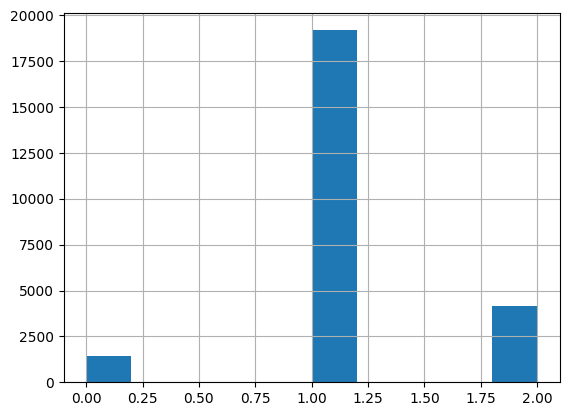

In [70]:
df['class'].hist()

In [71]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [72]:
df


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [73]:
hateSpeech = df[df['class']==0]
offensiveLanguage = df[df['class']==1]
none = df[df['class']==2]

In [74]:
print(hateSpeech.shape)
print(offensiveLanguage.shape)
print(none.shape)

(1430, 7)
(19190, 7)
(4163, 7)


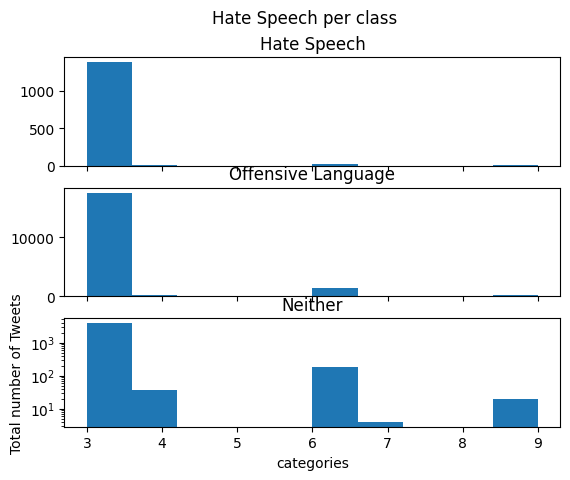

In [75]:
from matplotlib import pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex = True)
fig.suptitle('Hate Speech per class')

#print("hate:\n", hateSpeech['count'])

ax1.hist(hateSpeech['count'])
ax1.set_title('Hate Speech')

ax2.hist(offensiveLanguage['count'])
ax2.set_title('Offensive Language')

ax3.hist(none['count'])
ax3.set_title('Neither')

plt.xlabel('categories')
plt.ylabel('Total number of Tweets')

plt.yscale('log')
plt.show()

In [76]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


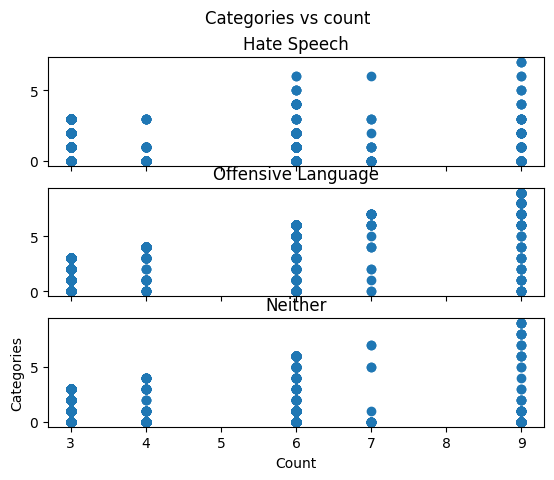

In [77]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
f.suptitle ('Categories vs count')
ax1.scatter (df['count'],df.hate_speech)
ax1.set_title('Hate Speech')
ax2.scatter(df['count'],df.offensive_language)
ax2.set_title('Offensive Language')
ax3.scatter(df['count'],df.neither)
ax3.set_title('Neither')

plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

In [78]:
df['hate_speech'] = df['hate_speech'].astype(float)
df['offensive_language'] = df['offensive_language'].astype(float)
df['neither'] = df['neither'].astype(float)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0.0,0.0,3.0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0.0,3.0,0.0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0.0,3.0,0.0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0.0,2.0,1.0,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0.0,6.0,0.0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0.0,2.0,1.0,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0.0,1.0,2.0,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0.0,3.0,0.0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0.0,6.0,0.0,1,youu got wild bitches tellin you lies


In [79]:
df['hate_speech'] = df['hate_speech'].astype(float)
df['offensive_language'] = df['offensive_language'].astype(float)
df['neither'] = df['neither'].astype(float)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0.0,0.0,3.0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0.0,3.0,0.0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0.0,3.0,0.0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0.0,2.0,1.0,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0.0,6.0,0.0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0.0,2.0,1.0,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0.0,1.0,2.0,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0.0,3.0,0.0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0.0,6.0,0.0,1,youu got wild bitches tellin you lies


In [80]:
tweets = df[["tweet"]]
tweets

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,"you've gone and broke the wrong heart baby, an..."
24780,young buck wanna eat!!.. dat nigguh like I ain...
24781,youu got wild bitches tellin you lies


In [81]:
def clean(text):
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [82]:
df["tweet"] = df['tweet'].apply(clean)

In [83]:
def preprocessing (text):
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text


In [84]:
df["tweet"] = df['tweet'].apply(preprocessing)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0.0,0.0,3.0,2,rt mayasolov woman shouldnt complain clean hou...
1,1,3,0.0,3.0,0.0,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0.0,3.0,0.0,1,rt urkindofbrand dawg rt ever fuck bitch start...
3,3,3,0.0,2.0,1.0,1,rt cganderson vivabas look like tranni
4,4,6,0.0,6.0,0.0,1,rt shenikarobert shit hear might true might fa...
...,...,...,...,...,...,...,...
24778,25291,3,0.0,2.0,1.0,1,yous muthafin lie coreyemanuel right tl trash ...
24779,25292,3,0.0,1.0,2.0,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0.0,3.0,0.0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0.0,6.0,0.0,1,youu got wild bitch tellin lie


In [85]:
class_new = df["class"].map({0:1,1:0,2:0})
df["class"] = class_new
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0.0,0.0,3.0,0,rt mayasolov woman shouldnt complain clean hou...
1,1,3,0.0,3.0,0.0,0,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0.0,3.0,0.0,0,rt urkindofbrand dawg rt ever fuck bitch start...
3,3,3,0.0,2.0,1.0,0,rt cganderson vivabas look like tranni
4,4,6,0.0,6.0,0.0,0,rt shenikarobert shit hear might true might fa...


In [86]:
categories = {1:"hate_speech",0:"another"}
value = df['class'].map(categories)

In [87]:
index = df.columns.get_loc("tweet")
df.insert(index,"value",value)

In [88]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,value,tweet
0,0,3,0.0,0.0,3.0,0,another,rt mayasolov woman shouldnt complain clean hou...
1,1,3,0.0,3.0,0.0,0,another,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0.0,3.0,0.0,0,another,rt urkindofbrand dawg rt ever fuck bitch start...
3,3,3,0.0,2.0,1.0,0,another,rt cganderson vivabas look like tranni
4,4,6,0.0,6.0,0.0,0,another,rt shenikarobert shit hear might true might fa...
...,...,...,...,...,...,...,...,...
24778,25291,3,0.0,2.0,1.0,0,another,yous muthafin lie coreyemanuel right tl trash ...
24779,25292,3,0.0,1.0,2.0,0,another,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0.0,3.0,0.0,0,another,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0.0,6.0,0.0,0,another,youu got wild bitch tellin lie


**Splitting the Dataset**

In [89]:
x = np.array(df["tweet"])
y= np.array(df['class'])

#cv = CountVectorizer()
#x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

**Implementation of ML models**

**Logistic Regression**

In [90]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)

**Evaluating Measures**

In [91]:
def calculate_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1
    }

**Evaluation on Logistic Regression**

In [92]:
# Calculate metrics for Logistic Regression
print("Logistic regression results")
metrics_log_reg = calculate_metrics(y_test, y_pred_log_reg)
print("Accuracy", metrics_log_reg['Accuracy'])
print("Prescision", metrics_log_reg['Precision'])
print("Recall", metrics_log_reg['Recall'])
print("F1 score", metrics_log_reg['F1 score'])

Logistic regression results
Accuracy 0.9400847286665321
Prescision 0.46464646464646464
Recall 0.15862068965517243
F1 score 0.2365038560411311


**Random Forest**

In [93]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
# Train the classifier
rf_classifier.fit(x_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

**Evaluation on Random Forest**

In [94]:
# Calculate metrics for Logistic Regression
print("Random Forest results")
metrics_rf= calculate_metrics(y_test, y_pred_rf)
print("Accuracy", metrics_rf['Accuracy'])
print("Prescision", metrics_rf['Precision'])
print("Recall", metrics_rf['Recall'])
print("F1 score", metrics_rf['F1 score'])

Random Forest results
Accuracy 0.9416986080290498
Prescision 0.5032679738562091
Recall 0.2655172413793103
F1 score 0.3476297968397291


**Naive Byes**

In [95]:
if hasattr(x_train, 'toarray'):
    x_train = x_train.toarray()

if hasattr(x_test, 'toarray'):
    x_test = x_test.toarray()

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)

**Evaluation on Naive Byes**

In [96]:
print("Naive Byes Results")
metrics_nb=calculate_metrics(y_test, y_pred_nb)
print("Accuracy", metrics_nb['Accuracy'])
print("Prescision", metrics_nb['Precision'])
print("Recall", metrics_nb['Recall'])
print("F1 score", metrics_nb['F1 score'])

Naive Byes Results
Accuracy 0.6834779100262255
Prescision 0.06819716407832546
Recall 0.3482758620689655
F1 score 0.11405985319028797


**KNN Algorithm**

In [97]:
# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(x_test)

**Evaluation on KNN**

In [98]:
print("KNN results")
metrics_knn=calculate_metrics(y_test, y_pred_knn)
print("Accuracy", metrics_knn['Accuracy'])
print("Prescision", metrics_knn['Precision'])
print("Recall", metrics_knn['Recall'])
print("F1 score", metrics_knn['F1 score'])

KNN results
Accuracy 0.9380673794633851
Prescision 0.4508670520231214
Recall 0.2689655172413793
F1 score 0.3369330453563715


**Decision Tree Classifier**

In [99]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(x_test)

**Evaluation on Decision Tree**

In [100]:
print("Decision Tree results")
metrics_dt=calculate_metrics(y_test, y_pred_dt)
print("Accuracy", metrics_dt['Accuracy'])
print("Prescision", metrics_dt['Precision'])
print("Recall", metrics_dt['Recall'])
print("F1 score", metrics_dt['F1 score'])

Decision Tree results
Accuracy 0.9267702239257616
Prescision 0.36823104693140796
Recall 0.35172413793103446
F1 score 0.3597883597883598


**SVM Classifier**

In [101]:
# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)

**Evaluation on SVM**

In [102]:
print("SVM Results")
metrics_svm=calculate_metrics(y_test, y_pred_svm)
print("Accuracy", metrics_svm['Accuracy'])
print("Prescision", metrics_svm['Precision'])
print("Recall", metrics_svm['Recall'])
print("F1 score", metrics_svm['F1 score'])

SVM Results
Accuracy 0.9322170667742586
Prescision 0.3693181818181818
Recall 0.22413793103448276
F1 score 0.2789699570815451


**Best Model on the basis of Accuracy**

In [103]:
def compare_all_models(metrics_dict):
    best_model = None
    best_accuracy = 0.0

    for model_name, metrics in metrics_dict.items():
        accuracy = metrics['Accuracy']

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name

    return best_model

metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_log_reg = calculate_metrics(y_test, y_pred_log_reg)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_dt= calculate_metrics(y_test, y_pred_dt)
metrics_svm = calculate_metrics(y_test, y_pred_svm)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_dict = {
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_log_reg,
    'Random Forest':metrics_rf,
    'Decision Tree' : metrics_dt,
    'SVM':metrics_svm,
    'KNN':metrics_knn

}

best_model = compare_all_models(metrics_dict)
print("Best Model based on Accuracy:", best_model)

Best Model based on Accuracy: Random Forest


**Best Model on the basis of F1 Score**

In [104]:
def compare_all_models(metrics_dict):
    best_model = None
    best_f1_score = 0.0

    for model_name, metrics in metrics_dict.items():
        f1_score = metrics['F1 score']

        if f1_score> best_f1_score:
            best_f1_score = f1_score
            best_model = model_name

    return best_model

metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_log_reg = calculate_metrics(y_test, y_pred_log_reg)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_dt= calculate_metrics(y_test, y_pred_dt)
metrics_svm = calculate_metrics(y_test, y_pred_svm)
metrics_knn = calculate_metrics(y_test, y_pred_knn)

metrics_dict = {
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_log_reg,
    'Random Forest':metrics_rf,
    'Decision Tree' : metrics_dt,
    'SVM':metrics_svm,
    'KNN':metrics_knn

}

best_model = compare_all_models(metrics_dict)
print("Best Model based on F1 score:", best_model)

Best Model based on F1 score: Decision Tree
